# Prosper Loan Data Investigation
## by Lukas Peterson

## Investigation Overview

The goal of this investigation is to determine factors that influence borrowers to Default, Miss a Payment, Chargedoff, or Cancel a loan. We will lump these Loan Statuses into an unfavorable category and a favorable category for loans that are current, complete, or not delinquent.

## Dataset Overview

Prosper Loan Data (prosperloanData.csv) represents personal loans requested through Prosper's peer to peer loan servicing network. Each row represents a loan with information on the listing request, loan details, and borrower's credit worthiness.

Our variable of interest is LoanStatus and its derived LoanStatus_good for favorable and unfavorable (delinquent) loan categories.
Supporting variables include; BorrowerRate, EstimatedReturn, ProsperRating, ProsperScore, ListingCategory, LoanOriginalAmount, LoanOriginationDate, CreditScoreRangeLower, CreditScoreRangeUpper, and Term.

In [74]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperloanData_visclean.csv')
df.head()

,Unnamed: 0,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,...,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditScoreAvg,CombinedRating,LoanStatus_cat,LoanStatus_good
0,0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00.000,0.16516,0.1580,...,0.0,1.0,0,0,0.0,258,649.5,C,Completed,T
1,1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,...,0.0,1.0,0,0,0.0,1,689.5,A,Current,T
2,2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00.000,0.28269,0.2750,...,0.0,1.0,0,0,0.0,41,489.5,HR,Completed,T
3,3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,...,0.0,1.0,0,0,0.0,158,809.5,A,Current,T
4,4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,...,0.0,1.0,0,0,0.0,20,689.5,D,Current,T


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)


During the US economic crisis, beginning 4Q 2008, loan deliquencies grew to their highest rates of 21%. Few loans were taken out in the quarters that followed, causing delinquencies to shrink down to 8% just two quarters later. In the following years the number of loans has grown significantly and the proportion of deliquency has leveled off.

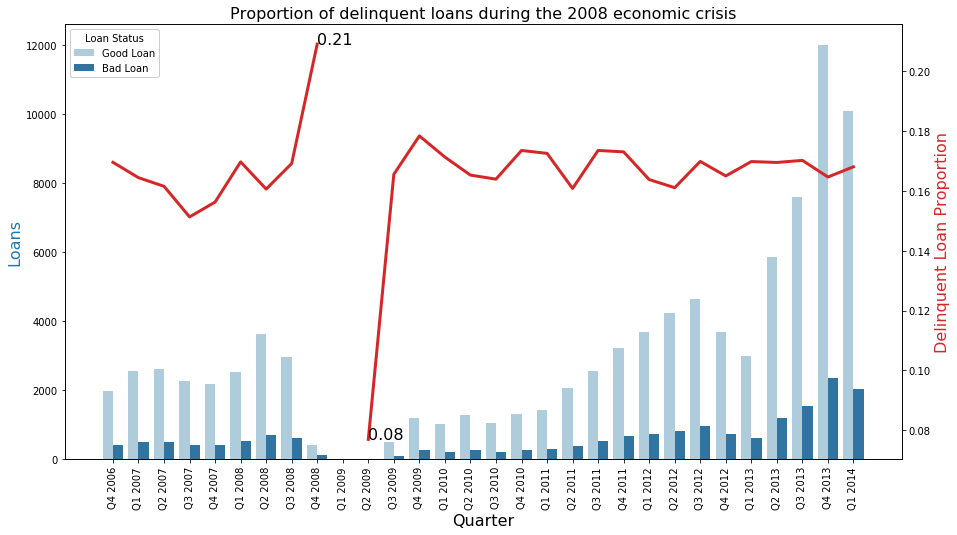

In [3]:
# Create a timeline
timeline = ['Q4 2006','Q1 2007','Q2 2007','Q3 2007','Q4 2007','Q1 2008','Q2 2008','Q3 2008','Q4 2008',
            'Q1 2009','Q2 2009','Q3 2009','Q4 2009','Q1 2010','Q2 2010','Q3 2010','Q4 2010',
            'Q1 2011','Q2 2011','Q3 2011','Q4 2011','Q1 2012','Q2 2012','Q3 2012','Q4 2012',
            'Q1 2013','Q2 2013','Q3 2013','Q4 2013','Q1 2014']


# Store a summary of LoanOriginationQuarter by Proportions for good and bad loans
quarter_props = df['LoanStatus_good'].groupby(df['LoanOriginationQuarter']).value_counts(normalize=True)\
.rename('Proportion').reset_index()
quarter_props = quarter_props.query('LoanStatus_good =="F"')
quarter_props = quarter_props.set_index('LoanOriginationQuarter').reindex(timeline)
quarter_props = quarter_props.reset_index()

#Define the plot size
fig=plt.figure(figsize=[15,8])

#Plot the countplot
plt.subplot(111)
ax1 = sb.countplot(df['LoanOriginationQuarter'], hue=df['LoanStatus_good'], order=timeline, palette='Paired')
ax1.tick_params(axis='y')
ax1.set_xlabel('Quarter', fontsize=16)
ax1.set_ylabel('Loans', fontsize=16, color=sb.color_palette("Paired")[1])
plt.xticks(rotation=90)
L = ax1.legend(loc=2, ncol=1, framealpha = 1, title = 'Loan Status')
L.get_texts()[0].set_text('Good Loan')
L.get_texts()[1].set_text('Bad Loan')

#Plot the lineplot
line_color = sb.color_palette()[3]
ax2 = ax1.twinx()
ax2 = plt.plot('LoanOriginationQuarter','Proportion', data=quarter_props, color=line_color, linewidth=3)
plt.ylabel('Delinquent Loan Proportion', fontsize=16, color=line_color)

#Add text to max and min proportions
max_point = quarter_props[quarter_props['Proportion'] == quarter_props['Proportion'].max()].reset_index()
min_point = quarter_props[quarter_props['Proportion'] == quarter_props['Proportion'].min()].reset_index()

plt.text(max_point.loc[0, 'LoanOriginationQuarter'], max_point.loc[0, 'Proportion'], 
         '{:.2f}'.format(max_point.loc[0, 'Proportion']), fontsize=16)

plt.text(min_point.loc[0, 'LoanOriginationQuarter'], min_point.loc[0, 'Proportion'], 
         '{:.2f}'.format(min_point.loc[0, 'Proportion']), fontsize=16)

#Plot accessories
plt.title('Proportion of delinquent loans during the 2008 economic crisis', fontsize=16); 

## (Visualization 2)


Lower rated loans have a higher proportion of loans that go delinquent or become unfavorable. Grade E loans are split almost 50/50 between good loans and delinquent loans. Loans that are not categorized with a rating have a 75% delinquency rate.

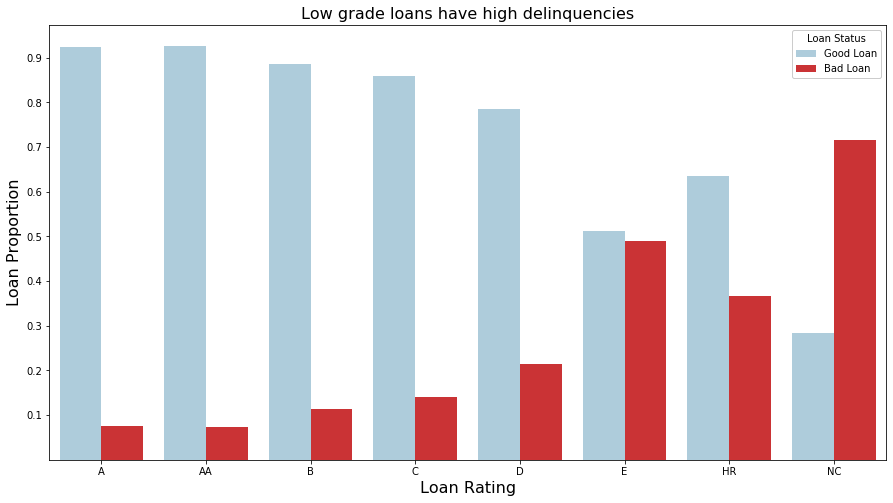

In [4]:
fig=plt.figure(figsize=[15,8])

#Store a summary of loan ratings by proportion for good and bad loans
rating_props = df['LoanStatus_good'].groupby(df['CombinedRating']).value_counts(normalize=True)\
.rename('Proportion').reset_index()

#Color palette
custom_palette = [sb.color_palette('Paired')[0], sb.color_palette('Paired')[5]]

#plot the barplot
sb.barplot(data = rating_props, x = 'CombinedRating', y='Proportion', hue='LoanStatus_good', 
             palette=custom_palette)

L = plt.legend(framealpha = 1, title = 'Loan Status')
L.get_texts()[0].set_text('Good Loan')
L.get_texts()[1].set_text('Bad Loan')
#Plot accessories
ticks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
plt.title('Low grade loans have high delinquencies', fontsize=16)
plt.xlabel('Loan Rating', fontsize=16)
plt.ylabel('Loan Proportion', fontsize=16)
plt.yticks(ticks, ticks);

## (Visualization 3)


Loan Categories have a measurable effect on delinquency. Green Loans top the chart with 25% going delinquent. 

I expected credit scores to correlate with delinquency however, during exploration they appeared to have no correlation. Although Green Loans represent the highest proportion of delinquent loans of any category, they have the highest average credit scores defying my intuition.

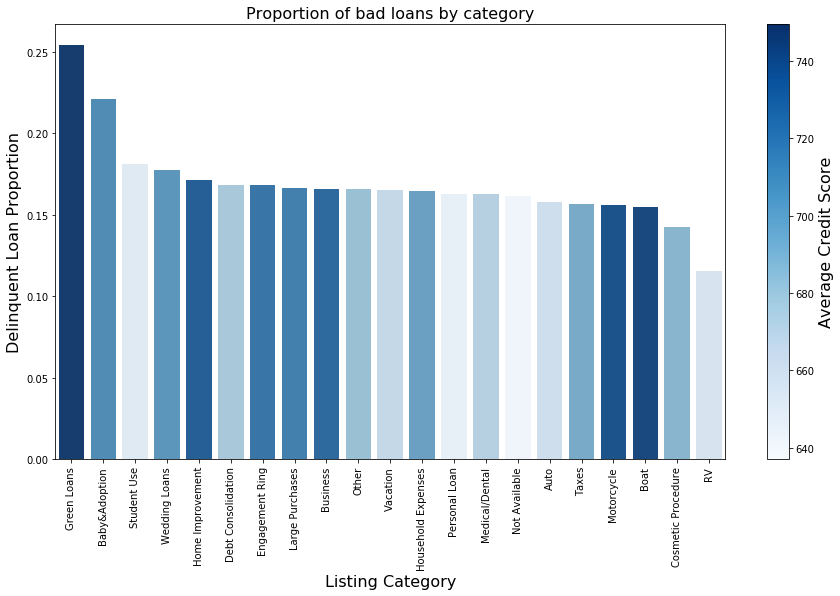

In [85]:
# Store a summary of ListingCategory by Proportions for good and bad loans
listing_props = df['LoanStatus_good'].groupby(df['ListingCategory']).value_counts(normalize=True)\
.rename('Proportion').reset_index()
listing_props = listing_props.query('LoanStatus_good == "F"').sort_values(by='Proportion', ascending=False)

# Store a summary of Listing Category by CreditScoreAvg
credit = df.query('LoanStatus_good == "F"').groupby('ListingCategory')['CreditScoreAvg'].mean().reset_index()

#Plot the figure
fig=plt.figure(figsize=[15,8])

#Define order
listing_order = listing_props.sort_values(by='Proportion', ascending=False)['ListingCategory']
credit_order = credit.sort_values(by='CreditScoreAvg', ascending=False)['ListingCategory']

#Plot the barplot
ax = sb.barplot(data=listing_props, x='ListingCategory', y='Proportion', hue='ListingCategory',
                 order=listing_order, dodge=False, palette='Blues_r', hue_order=credit_order)


#Plot colorbar
norm = plt.Normalize(credit['CreditScoreAvg'].min(), credit['CreditScoreAvg'].max())
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])

ax.get_legend().remove()
cbar = ax.figure.colorbar(sm)
cbar.set_label('Average Credit Score', fontsize=16)
#Plot Accessories
plt.title('Proportion of bad loans by category', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Listing Category', fontsize=16)
plt.ylabel('Delinquent loans by category', fontsize=16);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!